# URSAC: Python Tutorial

In [839]:
import numpy as np
import pandas as pd

Numpy: https://www.w3schools.com/python/numpy/numpy_intro.asp
Pandas: https://www.w3schools.com/python/pandas/default.asp

### Importing the Data

In [840]:
combine = pd.read_csv(r'\Users\benno\Desktop\Sports Analytics Data\nfl\combinedata.csv')

In [841]:
combine.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0


### Data Cleaning

In [842]:
combine['wasDrafted'] = combine['Pick'].notna()

In [843]:
#basic conditional formatting
oskill = combine[(combine['Pos'] == 'WR') | (combine['Pos'] == 'RB')]
dskill = combine[(combine['Pos'] == 'CB') | (combine['Pos'] == 'FS') | (combine['Pos'] == 'SS')]

In [844]:
#.loc loc(row index,columns)
rb = combine.loc[combine.Pos == 'RB', :]
wr = combine.loc[combine.Pos == 'RB', :]
cb = combine.loc[combine.Pos == 'CB', :]
s = combine.loc[(combine.Pos == 'FS') & (combine.Pos == 'SS'), :]

In [845]:
#removing null values
#took out broad and vert for now
osnew = oskill[(oskill['Forty'].notna()) & (oskill['Cone'].notna()) & (oskill['Shuttle'].notna()) & (oskill['Vertical'].notna()) & (oskill['BroadJump'].notna())]
dsnew = dskill[(dskill['Forty'].notna()) & (dskill['Cone'].notna()) & (dskill['Shuttle'].notna()) & (dskill['Vertical'].notna()) & (dskill['BroadJump'].notna())]

In [846]:
#dropping columns
osnew = osnew.drop(columns=['BenchReps','Year','Pfr_ID','Team'])
dsnew = dsnew.drop(columns=['BenchReps','Year','Pfr_ID','Team'])
osnew.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BroadJump,Cone,Shuttle,AV,Round,Pick,wasDrafted
32,Keith Brown,RB,71,216,4.66,30.0,117.0,6.64,4.08,0.0,NaN,NaN,False
33,Demario Brown,RB,72,217,4.72,31.0,107.0,7.17,4.39,0.0,NaN,NaN,False
48,Doug Chapman,RB,70,215,4.56,38.5,128.0,6.84,4.20,3.0,3.0,88.0,True
58,Chris Cole,WR,72,191,4.37,37.5,125.0,6.76,4.09,1.0,3.0,70.0,True
60,Chris Coleman,WR,72,211,4.61,32.5,110.0,6.79,4.10,0.0,NaN,NaN,False


### Simple Plots (with matplotlib & seaborn)

In [847]:
wrdf = combine[combine['Pos'] == 'WR']
wrdfclean = wrdf[(wrdf['Forty'].notna()) & (wrdf['Round'].notna())]

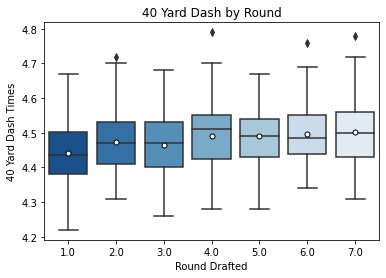

In [848]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = 'Round',
            y = 'Forty',
            data = wrdfclean,
            palette = "Blues_r",
            showmeans = True,
            meanprops = {"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.ylabel('40 Yard Dash Times')
plt.xlabel('Round Drafted')
plt.title('40 Yard Dash by Round')
plt.show()

Matplotlib: https://matplotlib.org/stable/index.html Seaborn: https://seaborn.pydata.org/

### Classification (Logistic Regression)

In [849]:
x = osnew[['Ht','Wt','Forty', 'Cone', 'Shuttle','BroadJump','Vertical']]
y = osnew['wasDrafted']

In [850]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [851]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter = 1000000000)
logR.fit(x_train, y_train)
predicted = logR.predict(x_test)

In [852]:
score = logR.score(x_test,y_test)
score

0.6813725490196079

Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

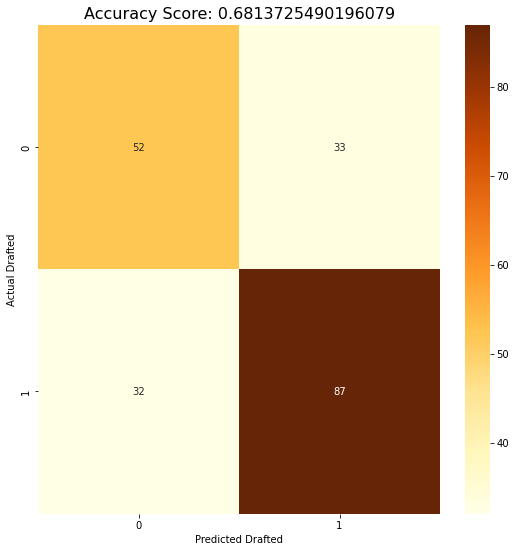

In [853]:
#confusion matrix using seaborn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, cmap = 'YlOrBr')
plt.ylabel('Actual Drafted')
plt.xlabel('Predicted Drafted')
plt.title('Accuracy Score: {0}'.format(score), size = 16)
plt.show()

Confusion Matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### Random Forest Model & Feature Importance

In [854]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
predicted2 = rf.predict(x_test)
metrics.accuracy_score(y_test, predicted2)

0.6274509803921569

In [855]:
feat = pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending = False)
feat

Forty        0.222858
Cone         0.162837
Wt           0.141830
Shuttle      0.140758
Vertical     0.127496
BroadJump    0.111981
Ht           0.092240
dtype: float64

In [881]:
rf.predict([[71, 190, 4.4, 7, 4.1, 110, 32]])

C:\Users\benno\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([ True])

Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Thank you! If you have any questions feel free to reach out to bnoe@u.rochester.edu or contact@rochestersportsanalytics.com